In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import torch
import torchvision
from torchvision import datasets, transforms

import torch.nn as nn
import torch.optim as optim
import copy
from tqdm import tqdm


# Define a transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize the pixel values to range [-1, 1]
])

# Download the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
# Download the testset
testset = datasets.MNIST('~/.pytorch/MNIST_data', train=False,
                                       download=True, transform=transform)

In [3]:
indices = list(range(len(trainset)))
np.random.shuffle(indices)
shuffled_trainset = torch.utils.data.Subset(trainset, indices)
print(len(shuffled_trainset))

60000


In [4]:
'''dataset1 = []
dataset2 = []
dataset3 = []
dataset4 = []
dataset5 = []
dataset6 = []

for i in range(10000):
    dataset1 = torch.utils.data.Subset(full_dataset, list(range(10000)))
    dataset1.append(shuffled_trainset[i])
    
for i in range(10000, 20000):
    
    dataset2.append(shuffled_trainset[i])
    
for i in range(20000, 30000):
    
    dataset3.append(shuffled_trainset[i])
    
for i in range(30000, 40000):
    
    dataset4.append(shuffled_trainset[i])
    
for i in range(40000, 50000):
    
    dataset5.append(shuffled_trainset[i])
for i in range(50000, 60000):
    
    dataset6.append(shuffled_trainset[i])'''
    
dataset1 = torch.utils.data.Subset(shuffled_trainset, list(range(10000)))
dataset2 = torch.utils.data.Subset(shuffled_trainset, list(range(10000, 20000)))
dataset3 = torch.utils.data.Subset(shuffled_trainset, list(range(20000, 30000)))
dataset4 = torch.utils.data.Subset(shuffled_trainset, list(range(30000, 40000)))
dataset5 = torch.utils.data.Subset(shuffled_trainset, list(range(40000, 50000)))
dataset6 = torch.utils.data.Subset(shuffled_trainset, list(range(50000, 60000)))

In [5]:
batch_size=64
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False)
trainloader = torch.utils.data.DataLoader(shuffled_trainset, batch_size=batch_size,
                                         shuffle=False)

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(npimg)
    plt.show()


In [7]:
from torchvision.transforms import v2

def apply_perspective_transform(image):


    mean = torch.mean(image)
    std = torch.std(image)

    perspective_transform = v2.Compose([
        v2.RandomPerspective(distortion_scale=0.3, p=1.0, fill=-1),
        v2.ToDtype(torch.float32, scale=True),
        #v2.Normalize(mean=[mean], std=[std]),
    ])

    transformed_image = perspective_transform(image)
    transformed_image = transformed_image.reshape(28,28)

    return transformed_image

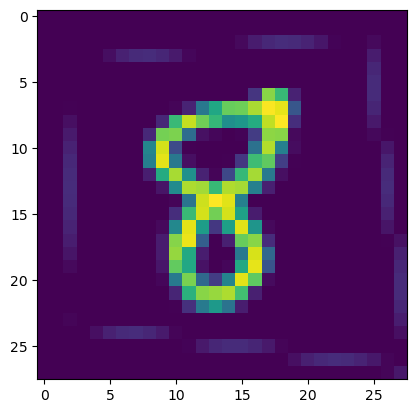

In [8]:
out = apply_perspective_transform(dataset1[0][0])
imshow(out)

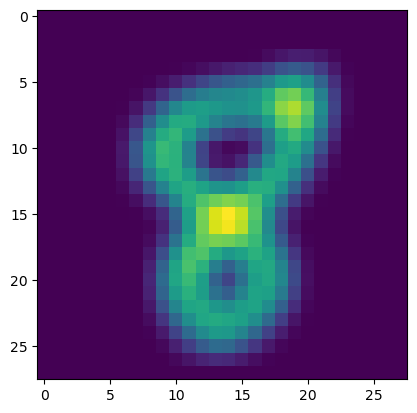

In [9]:
def apply_blur(image):


    blurrer = v2.GaussianBlur(kernel_size=5, sigma=(1, 2.))

    transformed_image = blurrer(image)
    transformed_image = transformed_image.reshape(28,28)

    return transformed_image


out = apply_blur(dataset1[0][0])


imshow(out)

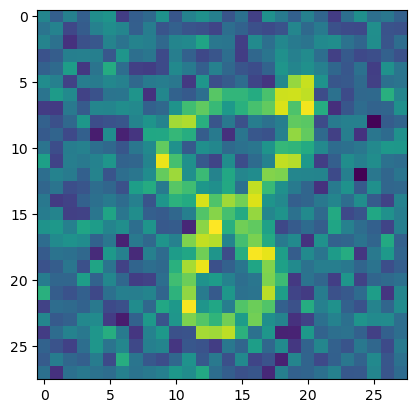

In [10]:
def apply_gaussian_noise(image):

    noise = np.random.normal(scale=0.5,size=(28,28))

    transformed_image = image + noise
    transformed_image = transformed_image.reshape(28,28)

    return transformed_image

out = apply_gaussian_noise(dataset1[0][0])


imshow(out)

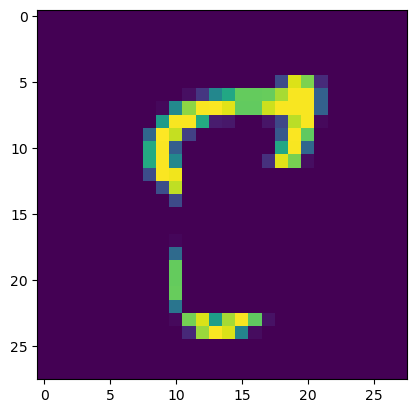

In [11]:
def apply_random_erase(image):


    erase = v2.RandomErasing(value=-1)

    transformed_image = erase(image)
    transformed_image = transformed_image.reshape(28,28)

    return transformed_image

out = apply_random_erase(dataset1[0][0])


imshow(out)

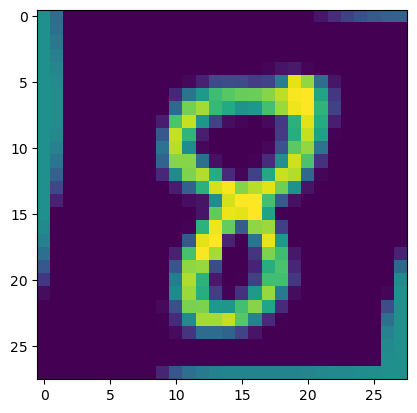

In [12]:
def apply_elastic_transform(image):
    elastic_transformer = v2.ElasticTransform(alpha=50.0)
    transformed_image = elastic_transformer(image)
    transformed_image = transformed_image.reshape(28, 28)
    return transformed_image

out = apply_elastic_transform(dataset1[0][0])
imshow(out)

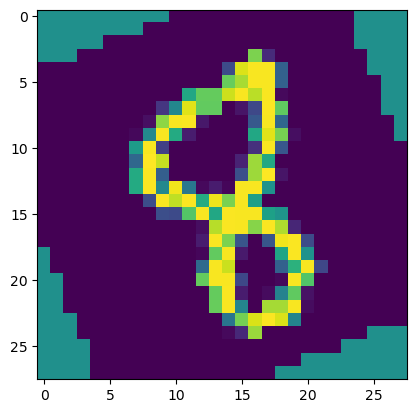

In [13]:
def apply_random_rotation(image):
    rotater = v2.RandomRotation(degrees=(0, 30))
    transformed_image = rotater(image)
    transformed_image = transformed_image.reshape(28, 28)
    return transformed_image

out = apply_random_rotation(dataset1[0][0])
imshow(out)

In [14]:
'''print(len(dataset1))
train_1 = []
for i in range(10000):
    train_1.append([apply_perspective_transform(dataset1[i][0]), dataset1[i][1]])
print(len(train_1))
train_2 = []
for i in range(10000):
    train_2.append(apply_blur(dataset2[i][0]))
train_3 = []
for i in range(10000):
    train_3.append(apply_gaussian_noise(dataset3[i][0]))
train_4 = []
for i in range(10000):
    train_4.append(apply_random_erase(dataset4[i][0]))
train_5 = []
for i in range(10000):
    train_5.append(apply_elastic_transform(dataset5[i][0]))
train_6 = []
for i in range(10000):
    train_6.append(apply_random_rotation(dataset6[i][0]))'''

for i in range(10000):
    dataset1[i][0] == apply_perspective_transform(dataset1[i][0])
for i in range(10000):
    dataset2[i][0] == apply_blur(dataset2[i][0])
for i in range(10000):
    dataset3[i][0] == apply_gaussian_noise(dataset3[i][0])
for i in range(10000):
    dataset4[i][0] == apply_random_erase(dataset4[i][0])
for i in range(10000):
    dataset5[i][0] == apply_elastic_transform(dataset5[i][0])
for i in range(10000):
    dataset6[i][0] == apply_random_rotation(dataset6[i][0])

In [15]:
batch_size=64
trainloaders = []
train_loader_1 = torch.utils.data.DataLoader(dataset1, batch_size=batch_size, shuffle=False)
train_loader_2 = torch.utils.data.DataLoader(dataset2, batch_size=batch_size, shuffle=False)
train_loader_3 = torch.utils.data.DataLoader(dataset3, batch_size=batch_size, shuffle=False)
train_loader_4 = torch.utils.data.DataLoader(dataset4, batch_size=batch_size, shuffle=False)
train_loader_5 = torch.utils.data.DataLoader(dataset5, batch_size=batch_size, shuffle=False)
train_loader_6 = torch.utils.data.DataLoader(dataset6, batch_size=batch_size, shuffle=False)
trainloaders.append(trainloader)
trainloaders.append(train_loader_1)
trainloaders.append(train_loader_2)
trainloaders.append(train_loader_3)
trainloaders.append(train_loader_4)
trainloaders.append(train_loader_5)
trainloaders.append(train_loader_6)

In [16]:
class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 2, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(2, 4, kernel_size=3, stride=1, padding=1)
        self.max_pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(4 * 7 * 7, 16)
        self.fc2 = nn.Linear(16, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.max_pool(self.relu(self.conv1(x)))
        x = self.max_pool(self.relu(self.conv2(x)))
        x = x.view(-1, 4 * 7 * 7)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    

def generate_models():

    models = []
    model = CustomCNN()
    model1 = CustomCNN()
    model2 = CustomCNN()
    model3 = CustomCNN()
    model4 = CustomCNN()
    model5 = CustomCNN()
    model6 = CustomCNN()

    models.append(model)
    models.append(model1)
    models.append(model2)
    models.append(model3)
    models.append(model4)
    models.append(model5)
    models.append(model6)

    initial_rand_parms = copy.deepcopy(model.state_dict())

    return models, initial_rand_parms

In [17]:
#initial_rand_parms = copy.deepcopy(model.state_dict())


In [18]:
def gen_optimizers(models):
    
        optimizers = []
        optimizer = optim.Adam(models[0].parameters(), lr=0.001)
        optimizer1 = optim.Adam(models[1].parameters(), lr=0.001)
        optimizer2 = optim.Adam(models[2].parameters(), lr=0.001)
        optimizer3 = optim.Adam(models[3].parameters(), lr=0.001)
        optimizer4 = optim.Adam(models[4].parameters(), lr=0.001)
        optimizer5 = optim.Adam(models[5].parameters(), lr=0.001)
        optimizer6 = optim.Adam(models[6].parameters(), lr=0.001)
        optimizers.append(optimizer)
        optimizers.append(optimizer1)
        optimizers.append(optimizer2)
        optimizers.append(optimizer3)
        optimizers.append(optimizer4)
        optimizers.append(optimizer5)
        optimizers.append(optimizer6)
    
        return optimizers


criterion = nn.CrossEntropyLoss()
# optimizers = []
# optimizer = optim.Adam(model.parameters(), lr=0.001)
# optimizer1 = optim.Adam(model1.parameters(), lr=0.001)
# optimizer2 = optim.Adam(model2.parameters(), lr=0.001)
# optimizer3 = optim.Adam(model3.parameters(), lr=0.001)
# optimizer4 = optim.Adam(model4.parameters(), lr=0.001)
# optimizer5 = optim.Adam(model5.parameters(), lr=0.001)
# optimizer6 = optim.Adam(model6.parameters(), lr=0.001)
# optimizers.append(optimizer)
# optimizers.append(optimizer1)
# optimizers.append(optimizer2)
# optimizers.append(optimizer3)
# optimizers.append(optimizer4)
# optimizers.append(optimizer5)
# optimizers.append(optimizer6)

In [19]:

def train_models(models, optimizers):

    num_epochs = 1
    
    criterion = nn.CrossEntropyLoss()
    for j in tqdm(range(7)):
        for epoch in range(num_epochs):
            running_loss = 0.0
            for i, data in enumerate(trainloaders[j], 0):
                #print(len(data))
                inputs, labels = data
                
                optimizers[j].zero_grad()
                
                outputs = models[j](inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizers[j].step()
                
                running_loss += loss.item()
                if i % 100 == 99:  # print every 200 mini-batches
                    print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(trainloaders[j])}], Loss: {running_loss / 200:.4f}')
                    running_loss = 0.0
        
    #print('Finished Training')

In [20]:
def test_model(model):

    correct = 0
    total = 0

    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    #print(f'Accuracy of th randomly initialized network on the 10000 test images: {100 * correct / total:.2f}%')
    return 100 * correct / total


# correct = 0
# total = 0

# with torch.no_grad():
#     for data in testloader:
#         images, labels = data
#         outputs = model(images)
#         _, predicted = torch.max(outputs.data, 1)
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()

# print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f}%')

In [21]:
# state_dict = model.state_dict()
# for param_tensor in state_dict:
#     print(f"{param_tensor}:\n {state_dict[param_tensor].numpy()}\n")
    
# filters = state_dict["conv2.weight"]
# extracted = []
# for i in range(filters.shape[0]):
#     for j in range(filters.shape[1]):
        

In [22]:
'''from torch.nn import functional as F

# calculate similarity along the rows
print(extracted[0])
tensor1 = extracted[0].unsqueeze(1)
tensor2 = extracted[1].unsqueeze(1)
cosine_similarity_row = F.cosine_similarity(tensor1, tensor2, dim=2)
print(cosine_similarity_row)'''

'''# PAIRWISE SIMILARITY
from sklearn.metrics.pairwise import pairwise_distances
from torch.nn import functional as F

X = extracted[0]
Y = extracted[1]

sim = pairwise_distances(X, Y, metric='cosine')
print(sim)


Xf = extracted[0].view(-1)
Yf = extracted[1].view(-1)

simF = F.cosine_similarity(Xf, Yf, dim=0)
print(simF)'''




"# PAIRWISE SIMILARITY\nfrom sklearn.metrics.pairwise import pairwise_distances\nfrom torch.nn import functional as F\n\nX = extracted[0]\nY = extracted[1]\n\nsim = pairwise_distances(X, Y, metric='cosine')\nprint(sim)\n\n\nXf = extracted[0].view(-1)\nYf = extracted[1].view(-1)\n\nsimF = F.cosine_similarity(Xf, Yf, dim=0)\nprint(simF)"

In [23]:
def calc_overall_sim(tensor1, tensor2):
    
    tensor1_flat = tensor1.view(-1)
    tensor2_flat = tensor2.view(-1)
    
    similarity = F.cosine_similarity(tensor1_flat, tensor2_flat, dim=0)
    similarity = torch.abs(similarity)
    
    return similarity.detach().numpy().reshape(1,)[0]

In [24]:
def calc_pearson_coeff(tensor1, tensor2):
    corr_coeff = np.corrcoef(tensor1.detach().numpy().flatten(), tensor2.detach().numpy().flatten())[0,1]
    corr_coeff = np.abs(corr_coeff)
    return corr_coeff

In [25]:
def calc_frob_norm(tensor1, tensor2):
    A = tensor1.detach().numpy()
    B = tensor2.detach().numpy()
    frobenius_norm = np.linalg.norm(A - B, ord='fro')
    return frobenius_norm

In [26]:
from torch.nn import functional as F
import matplotlib.pyplot as plt
#similarity_scores = np.zeros((6,8))
def compare_filters(models, metrics=['overall_sim', 'pearson_coeff', 'frob_norm']):

    similarity_scores_1 = []
    similarity_scores_2 = []
    similarity_scores_3 = []
    similarity_scores_4 = []
    similarity_scores_5 = []
    similarity_scores_6 = []
    similarity_scores_7 = []
    similarity_scores_8 = []
    similarity_scores_9 = []
    similarity_scores_10 = []

    for i in range(1, 7):

        cnn_filters_i = models[i].conv1.weight
        cnn_filters_i = cnn_filters_i.view(cnn_filters_i.size(0)*cnn_filters_i.size(1), cnn_filters_i.size(2), cnn_filters_i.size(3))   
        for j in range(2):

            filter1 = cnn_filters_i[j]

            for k in range(i+1, 7):
                cnn_filters_k = models[k].conv1.weight
                cnn_filters_k = cnn_filters_k.view(cnn_filters_k.size(0)*cnn_filters_k.size(1), cnn_filters_k.size(2), cnn_filters_k.size(3))
                filter2 = cnn_filters_k[j]
                if metrics == 'overall_sim':
                    similarity = calc_overall_sim(filter1, filter2)
                elif metrics == 'pearson_coeff': 
                    similarity = calc_pearson_coeff(filter1, filter2)
                elif metrics == 'frob_norm':
                    similarity = calc_frob_norm(filter1, filter2)
                #similarity = calc_overall_sim(filter1, filter2)
                #similarity = calc_pearson_coeff(filter1, filter2)
                #similarity = calc_frob_norm(filter1, filter2)

                if j==0:
                    similarity_scores_1.append(similarity)

                if j==1:
                    similarity_scores_2.append(similarity)
            


        cnn_filters = models[i].conv2.weight
        cnn_filters = cnn_filters.view(cnn_filters.size(0)*cnn_filters.size(1), cnn_filters.size(2), cnn_filters.size(3))
        print(cnn_filters.shape)
        
        for j in range(8):
            filter1 = cnn_filters[j]
            
            for k in range(i+1, 7):  # Fix: adjust the range to avoid out-of-bounds indices
                cnn_filters2 = models[k].conv2.weight
                cnn_filters2 = cnn_filters2.view(cnn_filters2.size(0)*cnn_filters2.size(1), cnn_filters2.size(2), cnn_filters2.size(3))
                filter2 = cnn_filters2[j]
                
                if metrics == 'overall_sim':
                    similarity = calc_overall_sim(filter1, filter2)
                elif metrics == 'pearson_coeff':
                    similarity = calc_pearson_coeff(filter1, filter2)
                elif metrics == 'frob_norm':
                    similarity = calc_frob_norm(filter1, filter2)
                #similarity = calc_overall_sim(filter1, filter2)
                #similarity = calc_pearson_coeff(filter1, filter2)
                #similarity = calc_frob_norm(filter1, filter2)
                
                if j==0:
                    similarity_scores_3.append(similarity)
                
                if j==1:
                    similarity_scores_4.append(similarity)
                
                if j==2:
                    similarity_scores_5.append(similarity)
                
                if j==3:
                    similarity_scores_6.append(similarity)
                
                if j==4:
                    similarity_scores_7.append(similarity)
                
                if j==5:
                    similarity_scores_8.append(similarity)
                
                if j==6:
                    similarity_scores_9.append(similarity)
                    
                if j==7:
                    similarity_scores_10.append(similarity)  







    # print(similarity_scores_1)
    # print(similarity_scores_2)
    # print(similarity_scores_3)
    # print(similarity_scores_4)
    # print(similarity_scores_5)
    # print(similarity_scores_6)
    # print(similarity_scores_7)
    # print(similarity_scores_8)
    # print(similarity_scores_9)
    # print(similarity_scores_10)

    return similarity_scores_1, similarity_scores_2, similarity_scores_3, similarity_scores_4, similarity_scores_5, similarity_scores_6, similarity_scores_7, similarity_scores_8, similarity_scores_9, similarity_scores_10




In [27]:


# filters_1 = []
# filters_2 = []
# filters_3 = []
# filters_4 = []
# filters_5 = []
# filters_6 = []
# filters_7 = []
# filters_8 = []
# filters_9 = []
# filters_10 = []
# for i in range(1,7):
#     cnn_filters = models[i].conv1.weight
#     cnn_filters = cnn_filters.view(cnn_filters.size(0)*cnn_filters.size(1), cnn_filters.size(2), cnn_filters.size(3))
#     for j in range(2):
#         if j==0:
#             filters_1.append(cnn_filters[j].detach().numpy())
#         if j==1:
#             filters_2.append(cnn_filters[j].detach().numpy())
#     cnn_filters = models[i].conv2.weight
#     cnn_filters = cnn_filters.view(cnn_filters.size(0)*cnn_filters.size(1), cnn_filters.size(2), cnn_filters.size(3))

#     for j in range(8):
#         if j==0:
#             filters_3.append(cnn_filters[j].detach().numpy())
#         if j==1:
#             filters_4.append(cnn_filters[j].detach().numpy())
#         if j==2:
#             filters_5.append(cnn_filters[j].detach().numpy())
#         if j==3:
#             filters_6.append(cnn_filters[j].detach().numpy())
#         if j==4:
#             filters_7.append(cnn_filters[j].detach().numpy())
#         if j==5:
#             filters_8.append(cnn_filters[j].detach().numpy())
#         if j==6:
#             filters_9.append(cnn_filters[j].detach().numpy())  
#         if j==7:   
#             filters_10.append(cnn_filters[j].detach().numpy())
            
# matrices = np.array(filters_1)
# variance_matrix = np.var(matrices, axis=0)   
# print(variance_matrix)

In [28]:


def get_max_index(similarity_scores):
    max_index = np.argmax(similarity_scores)
    return max_index

def get_max_index(similarity_scores_1, similarity_scores_2, similarity_scores_3, similarity_scores_4, similarity_scores_5, similarity_scores_6, similarity_scores_7, similarity_scores_8, similarity_scores_9, similarity_scores_10):

    filter1_idx = np.argmax(similarity_scores_1)
    filter2_idx = np.argmax(similarity_scores_2)
    filter3_idx = np.argmax(similarity_scores_3)
    filter4_idx = np.argmax(similarity_scores_4)
    filter5_idx = np.argmax(similarity_scores_5)
    filter6_idx = np.argmax(similarity_scores_6)
    filter7_idx = np.argmax(similarity_scores_7)
    filter8_idx = np.argmax(similarity_scores_8)
    filter9_idx = np.argmax(similarity_scores_9)
    filter10_idx = np.argmax(similarity_scores_10)

    indexes = [filter1_idx, filter2_idx, filter3_idx, filter4_idx, filter5_idx, filter6_idx, filter7_idx, filter8_idx, filter9_idx, filter10_idx]


    # print("Filter 1 index:", filter1_idx)
    # print("Filter 2 index:", filter2_idx)
    # print("Filter 3 index:", filter3_idx)
    # print("Filter 4 index:", filter4_idx)
    # print("Filter 5 index:", filter5_idx)
    # print("Filter 6 index:", filter6_idx)
    # print("Filter 7 index:", filter7_idx)
    # print("Filter 8 index:", filter8_idx)
    # print("Filter 9 index:", filter9_idx)
    # print("Filter 10 index:", filter10_idx)

    return indexes



#(1,2) (1,3) (1,4) (1,5) (1,6) (2,3) (2,4) (2,5) (2,6)  (3,4) (3,5) (3,6) (4,5) (4,6) (5,6)


#with torch.no_grad():
 #   net.conv1.weight[1][1] = torch.zeros((3, 3))

In [29]:
# Hand coding in the filters

def select_filters(models, indexes):
    selected_filters = []

    for i, idx in enumerate(indexes):
        if idx in range(0,5):
            if i == 0 or i == 1:
                selected_filters.append(models[1].conv1.weight[i])
            else:
                selected_filters.append(models[1].conv2.weight[(i//2)-1][i%2])

        if idx in range(5,9):
            if i == 0 or i == 1:
                selected_filters.append(models[2].conv1.weight[i])
            else:
                selected_filters.append(models[2].conv2.weight[(i//2)-1][i%2])
        if idx in range(9,12):
            if i == 0 or i == 1:
                selected_filters.append(models[3].conv1.weight[i])
            else:
                selected_filters.append(models[3].conv2.weight[(i//2)-1][i%2])
        if idx in range(12,14):
            if i == 0 or i == 1:
                selected_filters.append(models[4].conv1.weight[i])
            else:
                selected_filters.append(models[4].conv2.weight[(i//2)-1][i%2])
        if idx in range(14,15):
            if i == 0 or i == 1:
                selected_filters.append(models[5].conv1.weight[i])
            else:
                selected_filters.append(models[5].conv2.weight[(i//2)-1][i%2])

    return selected_filters

# selected_filters = []

# for i, idx in enumerate(indexes):
#     if idx in range(0,5):
#         if i == 0 or i == 1:
#             selected_filters.append(model1.conv1.weight[i])
#         else:
#             selected_filters.append(model1.conv2.weight[(i//2)-1][i%2])

#     if idx in range(5,9):
#         if i == 0 or i == 1:
#             selected_filters.append(model2.conv1.weight[i])
#         else:
#             selected_filters.append(model2.conv2.weight[(i//2)-1][i%2])
#     if idx in range(9,12):
#         if i == 0 or i == 1:
#             selected_filters.append(model3.conv1.weight[i])
#         else:
#             selected_filters.append(model3.conv2.weight[(i//2)-1][i%2])
#     if idx in range(12,14):
#         if i == 0 or i == 1:
#             selected_filters.append(model4.conv1.weight[i])
#         else:
#             selected_filters.append(model4.conv2.weight[(i//2)-1][i%2])
#     if idx in range(14,15):
#         if i == 0 or i == 1:
#             selected_filters.append(model5.conv1.weight[i])
#         else:
#             selected_filters.append(model5.conv2.weight[(i//2)-1][i%2])
    
        
        


In [30]:
# Warm starting a model with the selected filters
from torchsummary import summary


def gen_warm_start_model():

    model_warm_start = CustomCNN()
    summary(model_warm_start, (1, 28,28))

    with torch.no_grad():
        model_warm_start.conv1.weight[0] = selected_filters[0]
        model_warm_start.conv1.weight[1] = selected_filters[1]
        model_warm_start.conv2.weight[0][0] = selected_filters[2]
        model_warm_start.conv2.weight[0][1] = selected_filters[3]
        model_warm_start.conv2.weight[1][0] = selected_filters[4]
        model_warm_start.conv2.weight[1][1] = selected_filters[5]
        model_warm_start.conv2.weight[2][0] = selected_filters[6]
        model_warm_start.conv2.weight[2][1] = selected_filters[7]
        model_warm_start.conv2.weight[3][0] = selected_filters[8]
        model_warm_start.conv2.weight[3][1] = selected_filters[9]

    model_warm_start.requires_grad = True
    torch.enable_grad

    return model_warm_start



In [31]:


def train_warm_start_model(model_warm_start):
    num_epochs = 1

    optimizer_warm= optim.Adam(model_warm_start.parameters(), lr=0.001)


    initial_params = copy.deepcopy(model_warm_start.state_dict())
    print(initial_params.keys())

    with torch.enable_grad():

        for epoch in range(num_epochs):
            running_loss = 0.0
            for i, data in enumerate(trainloaders[0], 0):
                #print(len(data))
                inputs, labels = data
                
                optimizer_warm.zero_grad()
                
                outputs = model_warm_start(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer_warm.step()
                
                running_loss += loss.item()
                if i % 100 == 99:  # print every 200 mini-batches
                    print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(trainloaders[0])}], Loss: {running_loss / 200:.4f}')
                    running_loss = 0.0
        
    # print('Finished Training')

    print(model_warm_start.conv1.weight)
    final_params = model_warm_start.state_dict()

    return initial_params, final_params


In [32]:
def test_warm_start_model(model_warm_start):
    correct = 0
    total = 0

    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = model_warm_start(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # print(f'Accuracy of the warm started network on the 10000 test images: {100 * correct / total:.2f}%')

    return 100 * correct / total

# correct = 0
# total = 0

# with torch.no_grad():
#     for data in testloader:
#         images, labels = data
#         outputs = model_warm_start(images)
#         _, predicted = torch.max(outputs.data, 1)
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()

# print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f}%')

In [33]:


cosine_similarities = []
cosine_rand_accuracies = []
cosine_warm_accuracies = []

for i in range(10):

    cos_models = generate_models()
    cos_models = cos_models[0]
    cos_optimizers = gen_optimizers(cos_models)
    print(cos_optimizers[0])


    train_models(cos_models, cos_optimizers)
    similarity_scores_1, similarity_scores_2, similarity_scores_3, similarity_scores_4, similarity_scores_5, similarity_scores_6, similarity_scores_7, similarity_scores_8, similarity_scores_9, similarity_scores_10 = compare_filters(cos_models, metrics='overall_sim')
    indexes = get_max_index(similarity_scores_1, similarity_scores_2, similarity_scores_3, similarity_scores_4, similarity_scores_5, similarity_scores_6, similarity_scores_7, similarity_scores_8, similarity_scores_9, similarity_scores_10)
    selected_filters = select_filters(cos_models, indexes)
    model_warm_start = gen_warm_start_model()
    initial_params, final_params = train_warm_start_model(model_warm_start)
    accuracy = test_warm_start_model(model_warm_start)
    rand_accuracy = test_model(cos_models[0])

    cosine_similarities.append([similarity_scores_1, similarity_scores_2, similarity_scores_3, similarity_scores_4, similarity_scores_5, similarity_scores_6, similarity_scores_7, similarity_scores_8, similarity_scores_9, similarity_scores_10])
    cosine_rand_accuracies.append(rand_accuracy)
    cosine_warm_accuracies.append(accuracy)




pearson_similarities = []
pearson_rand_accuracies = []
pearson_warm_accuracies = []

for i in range(10):

    pear_models = generate_models()
    pear_models = pear_models[0]
    pear_optimizers = gen_optimizers(pear_models)
    print(pear_optimizers[0])
    
    train_models(pear_models, pear_optimizers)
    similarity_scores_1, similarity_scores_2, similarity_scores_3, similarity_scores_4, similarity_scores_5, similarity_scores_6, similarity_scores_7, similarity_scores_8, similarity_scores_9, similarity_scores_10 = compare_filters(pear_models, metrics='pearson_coeff')
    indexes = get_max_index(similarity_scores_1, similarity_scores_2, similarity_scores_3, similarity_scores_4, similarity_scores_5, similarity_scores_6, similarity_scores_7, similarity_scores_8, similarity_scores_9, similarity_scores_10)
    selected_filters = select_filters(pear_models, indexes)
    model_warm_start = gen_warm_start_model()
    initial_params, final_params = train_warm_start_model(model_warm_start)
    accuracy = test_warm_start_model(model_warm_start)
    rand_accuracy = test_model(pear_models[0])

    pearson_similarities.append([similarity_scores_1, similarity_scores_2, similarity_scores_3, similarity_scores_4, similarity_scores_5, similarity_scores_6, similarity_scores_7, similarity_scores_8, similarity_scores_9, similarity_scores_10])
    pearson_rand_accuracies.append(rand_accuracy)
    pearson_warm_accuracies.append(accuracy)



frob_norm_similarities = []
frob_norm_rand_accuracies = []
frob_norm_warm_accuracies = []

for i in range(10):

    frob_models = generate_models()
    frob_models = frob_models[0]
    frob_optimizers = gen_optimizers(frob_models)
    print(frob_optimizers[0])
        
    train_models(frob_models, frob_optimizers)
    similarity_scores_1, similarity_scores_2, similarity_scores_3, similarity_scores_4, similarity_scores_5, similarity_scores_6, similarity_scores_7, similarity_scores_8, similarity_scores_9, similarity_scores_10 = compare_filters(frob_models, metrics='frob_norm')
    indexes = get_max_index(similarity_scores_1, similarity_scores_2, similarity_scores_3, similarity_scores_4, similarity_scores_5, similarity_scores_6, similarity_scores_7, similarity_scores_8, similarity_scores_9, similarity_scores_10)
    selected_filters = select_filters(frob_models, indexes)
    model_warm_start = gen_warm_start_model()
    initial_params, final_params = train_warm_start_model(model_warm_start)
    accuracy = test_warm_start_model(model_warm_start)
    rand_accuracy = test_model(frob_models[0])

    frob_norm_similarities.append([similarity_scores_1, similarity_scores_2, similarity_scores_3, similarity_scores_4, similarity_scores_5, similarity_scores_6, similarity_scores_7, similarity_scores_8, similarity_scores_9, similarity_scores_10])
    frob_norm_rand_accuracies.append(rand_accuracy)
    frob_norm_warm_accuracies.append(accuracy)






Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)


  0%|          | 0/7 [00:00<?, ?it/s]

Epoch [1/1], Step [100/938], Loss: 1.0710
Epoch [1/1], Step [200/938], Loss: 0.5064
Epoch [1/1], Step [300/938], Loss: 0.2805
Epoch [1/1], Step [400/938], Loss: 0.2133
Epoch [1/1], Step [500/938], Loss: 0.1812
Epoch [1/1], Step [600/938], Loss: 0.1567
Epoch [1/1], Step [700/938], Loss: 0.1539
Epoch [1/1], Step [800/938], Loss: 0.1362
Epoch [1/1], Step [900/938], Loss: 0.1161


 14%|█▍        | 1/7 [00:12<01:17, 12.95s/it]

Epoch [1/1], Step [100/157], Loss: 1.0983


 29%|██▊       | 2/7 [00:15<00:34,  6.80s/it]

Epoch [1/1], Step [100/157], Loss: 1.0466


 43%|████▎     | 3/7 [00:17<00:19,  4.81s/it]

Epoch [1/1], Step [100/157], Loss: 1.0289


 57%|█████▋    | 4/7 [00:20<00:11,  3.89s/it]

Epoch [1/1], Step [100/157], Loss: 1.0462


 71%|███████▏  | 5/7 [00:22<00:06,  3.37s/it]

Epoch [1/1], Step [100/157], Loss: 1.0685


 86%|████████▌ | 6/7 [00:25<00:03,  3.07s/it]

Epoch [1/1], Step [100/157], Loss: 1.0567


100%|██████████| 7/7 [00:27<00:00,  3.97s/it]


torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 2, 28, 28]              20
              ReLU-2            [-1, 2, 28, 28]               0
         MaxPool2d-3            [-1, 2, 14, 14]               0
            Conv2d-4            [-1, 4, 14, 14]              76
              ReLU-5            [-1, 4, 14, 14]               0
         MaxPool2d-6              [-1, 4, 7, 7]               0
            Linear-7                   [-1, 16]           3,152
              ReLU-8                   [-1, 16]               0
            Linear-9                   [-1, 10]             170
Total params: 3,418
Trainable params: 3,418
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch [1/1], Step [100/938], Loss: 1.0680
Epoch [1/1], Step [200/938], Loss: 0.5804
Epoch [1/1], Step [300/938], Loss: 0.3237
Epoch [1/1], Step [400/938], Loss: 0.2411
Epoch [1/1], Step [500/938], Loss: 0.1953
Epoch [1/1], Step [600/938], Loss: 0.1719
Epoch [1/1], Step [700/938], Loss: 0.1725
Epoch [1/1], Step [800/938], Loss: 0.1518
Epoch [1/1], Step [900/938], Loss: 0.1308


 14%|█▍        | 1/7 [00:05<00:30,  5.08s/it]

Epoch [1/1], Step [100/157], Loss: 1.1154


 29%|██▊       | 2/7 [00:05<00:12,  2.59s/it]

Epoch [1/1], Step [100/157], Loss: 1.0515


 43%|████▎     | 3/7 [00:06<00:07,  1.80s/it]

Epoch [1/1], Step [100/157], Loss: 1.0866


 57%|█████▋    | 4/7 [00:07<00:04,  1.43s/it]

Epoch [1/1], Step [100/157], Loss: 1.0962


 71%|███████▏  | 5/7 [00:08<00:02,  1.22s/it]

Epoch [1/1], Step [100/157], Loss: 1.0784


 86%|████████▌ | 6/7 [00:09<00:01,  1.30s/it]

Epoch [1/1], Step [100/157], Loss: 1.0580


100%|██████████| 7/7 [00:12<00:00,  1.77s/it]


torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 2, 28, 28]              20
              ReLU-2            [-1, 2, 28, 28]               0
         MaxPool2d-3            [-1, 2, 14, 14]               0
            Conv2d-4            [-1, 4, 14, 14]              76
              ReLU-5            [-1, 4, 14, 14]               0
         MaxPool2d-6              [-1, 4, 7, 7]               0
            Linear-7                   [-1, 16]           3,152
              ReLU-8                   [-1, 16]               0
            Linear-9                   [-1, 10]             170
Total params: 3,418
Trainable params: 3,418
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch [1/1], Step [100/938], Loss: 1.0900
Epoch [1/1], Step [200/938], Loss: 0.6026
Epoch [1/1], Step [300/938], Loss: 0.2908
Epoch [1/1], Step [400/938], Loss: 0.2141
Epoch [1/1], Step [500/938], Loss: 0.1762
Epoch [1/1], Step [600/938], Loss: 0.1470
Epoch [1/1], Step [700/938], Loss: 0.1408
Epoch [1/1], Step [800/938], Loss: 0.1211
Epoch [1/1], Step [900/938], Loss: 0.1013


 14%|█▍        | 1/7 [00:11<01:08, 11.41s/it]

Epoch [1/1], Step [100/157], Loss: 1.0794


 29%|██▊       | 2/7 [00:12<00:26,  5.21s/it]

Epoch [1/1], Step [100/157], Loss: 1.0660


 43%|████▎     | 3/7 [00:13<00:12,  3.24s/it]

Epoch [1/1], Step [100/157], Loss: 1.0731


 57%|█████▋    | 4/7 [00:14<00:06,  2.32s/it]

Epoch [1/1], Step [100/157], Loss: 1.1069


 71%|███████▏  | 5/7 [00:14<00:03,  1.80s/it]

Epoch [1/1], Step [100/157], Loss: 1.0642


 86%|████████▌ | 6/7 [00:15<00:01,  1.48s/it]

Epoch [1/1], Step [100/157], Loss: 1.0690


100%|██████████| 7/7 [00:16<00:00,  2.39s/it]


torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 2, 28, 28]              20
              ReLU-2            [-1, 2, 28, 28]               0
         MaxPool2d-3            [-1, 2, 14, 14]               0
            Conv2d-4            [-1, 4, 14, 14]              76
              ReLU-5            [-1, 4, 14, 14]               0
         MaxPool2d-6              [-1, 4, 7, 7]               0
            Linear-7                   [-1, 16]           3,152
              ReLU-8                   [-1, 16]               0
            Linear-9                   [-1, 10]             170
Total params: 3,418
Trainable params: 3,418
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch [1/1], Step [100/938], Loss: 1.0534
Epoch [1/1], Step [200/938], Loss: 0.4986
Epoch [1/1], Step [300/938], Loss: 0.2793
Epoch [1/1], Step [400/938], Loss: 0.2266
Epoch [1/1], Step [500/938], Loss: 0.1943
Epoch [1/1], Step [600/938], Loss: 0.1771
Epoch [1/1], Step [700/938], Loss: 0.1810
Epoch [1/1], Step [800/938], Loss: 0.1590
Epoch [1/1], Step [900/938], Loss: 0.1375


 14%|█▍        | 1/7 [00:08<00:49,  8.20s/it]

Epoch [1/1], Step [100/157], Loss: 1.1002


 29%|██▊       | 2/7 [00:09<00:20,  4.02s/it]

Epoch [1/1], Step [100/157], Loss: 1.0868


 43%|████▎     | 3/7 [00:10<00:11,  2.82s/it]

Epoch [1/1], Step [100/157], Loss: 1.1053


 57%|█████▋    | 4/7 [00:13<00:08,  2.71s/it]

Epoch [1/1], Step [100/157], Loss: 0.9979


 71%|███████▏  | 5/7 [00:15<00:05,  2.66s/it]

Epoch [1/1], Step [100/157], Loss: 1.0715


 86%|████████▌ | 6/7 [00:18<00:02,  2.61s/it]

Epoch [1/1], Step [100/157], Loss: 0.9233


100%|██████████| 7/7 [00:20<00:00,  2.97s/it]


torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 2, 28, 28]              20
              ReLU-2            [-1, 2, 28, 28]               0
         MaxPool2d-3            [-1, 2, 14, 14]               0
            Conv2d-4            [-1, 4, 14, 14]              76
              ReLU-5            [-1, 4, 14, 14]               0
         MaxPool2d-6              [-1, 4, 7, 7]               0
            Linear-7                   [-1, 16]           3,152
              ReLU-8                   [-1, 16]               0
            Linear-9                   [-1, 10]             170
Total params: 3,418
Trainable params: 3,418
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch [1/1], Step [100/938], Loss: 1.0562
Epoch [1/1], Step [200/938], Loss: 0.4629
Epoch [1/1], Step [300/938], Loss: 0.2426
Epoch [1/1], Step [400/938], Loss: 0.1967
Epoch [1/1], Step [500/938], Loss: 0.1657
Epoch [1/1], Step [600/938], Loss: 0.1498
Epoch [1/1], Step [700/938], Loss: 0.1495
Epoch [1/1], Step [800/938], Loss: 0.1291
Epoch [1/1], Step [900/938], Loss: 0.1149


 14%|█▍        | 1/7 [00:09<00:59,  9.97s/it]

Epoch [1/1], Step [100/157], Loss: 1.0581


 29%|██▊       | 2/7 [00:12<00:26,  5.37s/it]

Epoch [1/1], Step [100/157], Loss: 1.0364


 43%|████▎     | 3/7 [00:14<00:15,  3.99s/it]

Epoch [1/1], Step [100/157], Loss: 1.1397


 57%|█████▋    | 4/7 [00:16<00:09,  3.26s/it]

Epoch [1/1], Step [100/157], Loss: 1.1204


 71%|███████▏  | 5/7 [00:18<00:05,  2.72s/it]

Epoch [1/1], Step [100/157], Loss: 1.0352


 86%|████████▌ | 6/7 [00:20<00:02,  2.43s/it]

Epoch [1/1], Step [100/157], Loss: 1.0082


100%|██████████| 7/7 [00:21<00:00,  3.09s/it]


torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 2, 28, 28]              20
              ReLU-2            [-1, 2, 28, 28]               0
         MaxPool2d-3            [-1, 2, 14, 14]               0
            Conv2d-4            [-1, 4, 14, 14]              76
              ReLU-5            [-1, 4, 14, 14]               0
         MaxPool2d-6              [-1, 4, 7, 7]               0
            Linear-7                   [-1, 16]           3,152
              ReLU-8                   [-1, 16]               0
            Linear-9                   [-1, 10]             170
Total params: 3,418
Trainable params: 3,418
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch [1/1], Step [100/938], Loss: 1.1117
Epoch [1/1], Step [200/938], Loss: 0.6338
Epoch [1/1], Step [300/938], Loss: 0.3359
Epoch [1/1], Step [400/938], Loss: 0.2745
Epoch [1/1], Step [500/938], Loss: 0.2282
Epoch [1/1], Step [600/938], Loss: 0.2015
Epoch [1/1], Step [700/938], Loss: 0.1869
Epoch [1/1], Step [800/938], Loss: 0.1641
Epoch [1/1], Step [900/938], Loss: 0.1389


 14%|█▍        | 1/7 [00:13<01:23, 13.84s/it]

Epoch [1/1], Step [100/157], Loss: 0.9708


 29%|██▊       | 2/7 [00:16<00:36,  7.31s/it]

Epoch [1/1], Step [100/157], Loss: 1.0327


 43%|████▎     | 3/7 [00:19<00:20,  5.17s/it]

Epoch [1/1], Step [100/157], Loss: 1.0884


 57%|█████▋    | 4/7 [00:21<00:12,  4.23s/it]

Epoch [1/1], Step [100/157], Loss: 1.0700


 71%|███████▏  | 5/7 [00:24<00:07,  3.64s/it]

Epoch [1/1], Step [100/157], Loss: 1.0149


 86%|████████▌ | 6/7 [00:26<00:03,  3.13s/it]

Epoch [1/1], Step [100/157], Loss: 0.9905


100%|██████████| 7/7 [00:28<00:00,  4.11s/it]


torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 2, 28, 28]              20
              ReLU-2            [-1, 2, 28, 28]               0
         MaxPool2d-3            [-1, 2, 14, 14]               0
            Conv2d-4            [-1, 4, 14, 14]              76
              ReLU-5            [-1, 4, 14, 14]               0
         MaxPool2d-6              [-1, 4, 7, 7]               0
            Linear-7                   [-1, 16]           3,152
              ReLU-8                   [-1, 16]               0
            Linear-9                   [-1, 10]             170
Total params: 3,418
Trainable params: 3,418
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch [1/1], Step [100/938], Loss: 1.0415
Epoch [1/1], Step [200/938], Loss: 0.4278
Epoch [1/1], Step [300/938], Loss: 0.2023
Epoch [1/1], Step [400/938], Loss: 0.1572
Epoch [1/1], Step [500/938], Loss: 0.1274
Epoch [1/1], Step [600/938], Loss: 0.1192
Epoch [1/1], Step [700/938], Loss: 0.1182
Epoch [1/1], Step [800/938], Loss: 0.1005
Epoch [1/1], Step [900/938], Loss: 0.0892


 14%|█▍        | 1/7 [00:08<00:50,  8.46s/it]

Epoch [1/1], Step [100/157], Loss: 1.1425


 29%|██▊       | 2/7 [00:09<00:21,  4.25s/it]

Epoch [1/1], Step [100/157], Loss: 1.0154


 43%|████▎     | 3/7 [00:11<00:12,  3.20s/it]

Epoch [1/1], Step [100/157], Loss: 1.0926


 57%|█████▋    | 4/7 [00:14<00:08,  2.99s/it]

Epoch [1/1], Step [100/157], Loss: 1.0063


 71%|███████▏  | 5/7 [00:16<00:05,  2.54s/it]

Epoch [1/1], Step [100/157], Loss: 1.0580


 86%|████████▌ | 6/7 [00:18<00:02,  2.54s/it]

Epoch [1/1], Step [100/157], Loss: 1.0033


100%|██████████| 7/7 [00:20<00:00,  2.90s/it]


torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 2, 28, 28]              20
              ReLU-2            [-1, 2, 28, 28]               0
         MaxPool2d-3            [-1, 2, 14, 14]               0
            Conv2d-4            [-1, 4, 14, 14]              76
              ReLU-5            [-1, 4, 14, 14]               0
         MaxPool2d-6              [-1, 4, 7, 7]               0
            Linear-7                   [-1, 16]           3,152
              ReLU-8                   [-1, 16]               0
            Linear-9                   [-1, 10]             170
Total params: 3,418
Trainable params: 3,418
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch [1/1], Step [100/938], Loss: 1.1216
Epoch [1/1], Step [200/938], Loss: 0.7663
Epoch [1/1], Step [300/938], Loss: 0.4389
Epoch [1/1], Step [400/938], Loss: 0.3537
Epoch [1/1], Step [500/938], Loss: 0.3011
Epoch [1/1], Step [600/938], Loss: 0.2761
Epoch [1/1], Step [700/938], Loss: 0.2722
Epoch [1/1], Step [800/938], Loss: 0.2399
Epoch [1/1], Step [900/938], Loss: 0.2108


 14%|█▍        | 1/7 [00:10<01:02, 10.41s/it]

Epoch [1/1], Step [100/157], Loss: 1.0295


 29%|██▊       | 2/7 [00:12<00:26,  5.33s/it]

Epoch [1/1], Step [100/157], Loss: 1.0157


 43%|████▎     | 3/7 [00:14<00:16,  4.14s/it]

Epoch [1/1], Step [100/157], Loss: 1.0353


 57%|█████▋    | 4/7 [00:17<00:10,  3.66s/it]

Epoch [1/1], Step [100/157], Loss: 1.0273


 71%|███████▏  | 5/7 [00:20<00:06,  3.44s/it]

Epoch [1/1], Step [100/157], Loss: 0.9244


 86%|████████▌ | 6/7 [00:22<00:02,  2.88s/it]

Epoch [1/1], Step [100/157], Loss: 1.0190


100%|██████████| 7/7 [00:24<00:00,  3.45s/it]


torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 2, 28, 28]              20
              ReLU-2            [-1, 2, 28, 28]               0
         MaxPool2d-3            [-1, 2, 14, 14]               0
            Conv2d-4            [-1, 4, 14, 14]              76
              ReLU-5            [-1, 4, 14, 14]               0
         MaxPool2d-6              [-1, 4, 7, 7]               0
            Linear-7                   [-1, 16]           3,152
              ReLU-8                   [-1, 16]               0
            Linear-9                   [-1, 10]             170
Total params: 3,418
Trainable params: 3,418
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch [1/1], Step [100/938], Loss: 1.0632
Epoch [1/1], Step [200/938], Loss: 0.4247
Epoch [1/1], Step [300/938], Loss: 0.2368
Epoch [1/1], Step [400/938], Loss: 0.1893
Epoch [1/1], Step [500/938], Loss: 0.1562
Epoch [1/1], Step [600/938], Loss: 0.1435
Epoch [1/1], Step [700/938], Loss: 0.1353
Epoch [1/1], Step [800/938], Loss: 0.1187
Epoch [1/1], Step [900/938], Loss: 0.0964


 14%|█▍        | 1/7 [00:07<00:43,  7.23s/it]

Epoch [1/1], Step [100/157], Loss: 1.0154


 29%|██▊       | 2/7 [00:08<00:18,  3.66s/it]

Epoch [1/1], Step [100/157], Loss: 1.1137


 43%|████▎     | 3/7 [00:09<00:10,  2.62s/it]

Epoch [1/1], Step [100/157], Loss: 1.0866


 57%|█████▋    | 4/7 [00:11<00:06,  2.16s/it]

Epoch [1/1], Step [100/157], Loss: 1.1143


 71%|███████▏  | 5/7 [00:12<00:03,  1.90s/it]

Epoch [1/1], Step [100/157], Loss: 1.0161


 86%|████████▌ | 6/7 [00:13<00:01,  1.68s/it]

Epoch [1/1], Step [100/157], Loss: 0.9731


100%|██████████| 7/7 [00:15<00:00,  2.24s/it]


torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 2, 28, 28]              20
              ReLU-2            [-1, 2, 28, 28]               0
         MaxPool2d-3            [-1, 2, 14, 14]               0
            Conv2d-4            [-1, 4, 14, 14]              76
              ReLU-5            [-1, 4, 14, 14]               0
         MaxPool2d-6              [-1, 4, 7, 7]               0
            Linear-7                   [-1, 16]           3,152
              ReLU-8                   [-1, 16]               0
            Linear-9                   [-1, 10]             170
Total params: 3,418
Trainable params: 3,418
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch [1/1], Step [100/938], Loss: 0.9976
Epoch [1/1], Step [200/938], Loss: 0.4423
Epoch [1/1], Step [300/938], Loss: 0.2920
Epoch [1/1], Step [400/938], Loss: 0.2508
Epoch [1/1], Step [500/938], Loss: 0.2163
Epoch [1/1], Step [600/938], Loss: 0.2020
Epoch [1/1], Step [700/938], Loss: 0.1954
Epoch [1/1], Step [800/938], Loss: 0.1718
Epoch [1/1], Step [900/938], Loss: 0.1580


 14%|█▍        | 1/7 [00:12<01:13, 12.26s/it]

Epoch [1/1], Step [100/157], Loss: 0.9948


 29%|██▊       | 2/7 [00:14<00:32,  6.47s/it]

Epoch [1/1], Step [100/157], Loss: 1.0017


 43%|████▎     | 3/7 [00:16<00:16,  4.22s/it]

Epoch [1/1], Step [100/157], Loss: 1.1238


 57%|█████▋    | 4/7 [00:17<00:09,  3.07s/it]

Epoch [1/1], Step [100/157], Loss: 1.0962


 71%|███████▏  | 5/7 [00:19<00:05,  2.60s/it]

Epoch [1/1], Step [100/157], Loss: 1.0411


 86%|████████▌ | 6/7 [00:22<00:02,  2.65s/it]

Epoch [1/1], Step [100/157], Loss: 1.0288


100%|██████████| 7/7 [00:24<00:00,  3.54s/it]


torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 2, 28, 28]              20
              ReLU-2            [-1, 2, 28, 28]               0
         MaxPool2d-3            [-1, 2, 14, 14]               0
            Conv2d-4            [-1, 4, 14, 14]              76
              ReLU-5            [-1, 4, 14, 14]               0
         MaxPool2d-6              [-1, 4, 7, 7]               0
            Linear-7                   [-1, 16]           3,152
              ReLU-8                   [-1, 16]               0
            Linear-9                   [-1, 10]             170
Total params: 3,418
Trainable params: 3,418
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch [1/1], Step [100/938], Loss: 1.0656
Epoch [1/1], Step [200/938], Loss: 0.5175
Epoch [1/1], Step [300/938], Loss: 0.2696
Epoch [1/1], Step [400/938], Loss: 0.2204
Epoch [1/1], Step [500/938], Loss: 0.1887
Epoch [1/1], Step [600/938], Loss: 0.1728
Epoch [1/1], Step [700/938], Loss: 0.1654
Epoch [1/1], Step [800/938], Loss: 0.1459
Epoch [1/1], Step [900/938], Loss: 0.1242


 14%|█▍        | 1/7 [00:15<01:35, 15.85s/it]

Epoch [1/1], Step [100/157], Loss: 0.9409


 29%|██▊       | 2/7 [00:18<00:40,  8.06s/it]

Epoch [1/1], Step [100/157], Loss: 1.0074


 43%|████▎     | 3/7 [00:21<00:22,  5.55s/it]

Epoch [1/1], Step [100/157], Loss: 1.0744


 57%|█████▋    | 4/7 [00:23<00:13,  4.45s/it]

Epoch [1/1], Step [100/157], Loss: 1.0828


 71%|███████▏  | 5/7 [00:26<00:07,  3.80s/it]

Epoch [1/1], Step [100/157], Loss: 1.0749


 86%|████████▌ | 6/7 [00:29<00:03,  3.49s/it]

Epoch [1/1], Step [100/157], Loss: 1.0321


100%|██████████| 7/7 [00:31<00:00,  4.56s/it]


torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 2, 28, 28]              20
              ReLU-2            [-1, 2, 28, 28]               0
         MaxPool2d-3            [-1, 2, 14, 14]               0
            Conv2d-4            [-1, 4, 14, 14]              76
              ReLU-5            [-1, 4, 14, 14]               0
         MaxPool2d-6              [-1, 4, 7, 7]               0
            Linear-7                   [-1, 16]           3,152
              ReLU-8                   [-1, 16]               0
            Linear-9                   [-1, 10]             170
Total params: 3,418
Trainable params: 3,418
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch [1/1], Step [100/938], Loss: 1.0972
Epoch [1/1], Step [200/938], Loss: 0.5948
Epoch [1/1], Step [300/938], Loss: 0.3267
Epoch [1/1], Step [400/938], Loss: 0.2500
Epoch [1/1], Step [500/938], Loss: 0.2079
Epoch [1/1], Step [600/938], Loss: 0.1860
Epoch [1/1], Step [700/938], Loss: 0.1853
Epoch [1/1], Step [800/938], Loss: 0.1633
Epoch [1/1], Step [900/938], Loss: 0.1411


 14%|█▍        | 1/7 [00:09<00:56,  9.47s/it]

Epoch [1/1], Step [100/157], Loss: 1.0462


 29%|██▊       | 2/7 [00:10<00:23,  4.77s/it]

Epoch [1/1], Step [100/157], Loss: 1.0117


 43%|████▎     | 3/7 [00:12<00:12,  3.22s/it]

Epoch [1/1], Step [100/157], Loss: 1.0497


 57%|█████▋    | 4/7 [00:13<00:07,  2.44s/it]

Epoch [1/1], Step [100/157], Loss: 1.0041


 71%|███████▏  | 5/7 [00:14<00:04,  2.05s/it]

Epoch [1/1], Step [100/157], Loss: 1.0891


 86%|████████▌ | 6/7 [00:16<00:01,  1.77s/it]

Epoch [1/1], Step [100/157], Loss: 1.0364


100%|██████████| 7/7 [00:17<00:00,  2.52s/it]


torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 2, 28, 28]              20
              ReLU-2            [-1, 2, 28, 28]               0
         MaxPool2d-3            [-1, 2, 14, 14]               0
            Conv2d-4            [-1, 4, 14, 14]              76
              ReLU-5            [-1, 4, 14, 14]               0
         MaxPool2d-6              [-1, 4, 7, 7]               0
            Linear-7                   [-1, 16]           3,152
              ReLU-8                   [-1, 16]               0
            Linear-9                   [-1, 10]             170
Total params: 3,418
Trainable params: 3,418
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch [1/1], Step [100/938], Loss: 1.0294
Epoch [1/1], Step [200/938], Loss: 0.4995
Epoch [1/1], Step [300/938], Loss: 0.3221
Epoch [1/1], Step [400/938], Loss: 0.2707
Epoch [1/1], Step [500/938], Loss: 0.2508
Epoch [1/1], Step [600/938], Loss: 0.2333
Epoch [1/1], Step [700/938], Loss: 0.2273
Epoch [1/1], Step [800/938], Loss: 0.2112
Epoch [1/1], Step [900/938], Loss: 0.1816


 14%|█▍        | 1/7 [00:14<01:28, 14.80s/it]

Epoch [1/1], Step [100/157], Loss: 1.0832


 29%|██▊       | 2/7 [00:17<00:37,  7.46s/it]

Epoch [1/1], Step [100/157], Loss: 1.0725


 43%|████▎     | 3/7 [00:18<00:18,  4.68s/it]

Epoch [1/1], Step [100/157], Loss: 1.0839


 57%|█████▋    | 4/7 [00:19<00:09,  3.29s/it]

Epoch [1/1], Step [100/157], Loss: 1.0594


 71%|███████▏  | 5/7 [00:21<00:05,  2.61s/it]

Epoch [1/1], Step [100/157], Loss: 1.1026


 86%|████████▌ | 6/7 [00:23<00:02,  2.51s/it]

Epoch [1/1], Step [100/157], Loss: 0.9952


100%|██████████| 7/7 [00:25<00:00,  3.65s/it]


torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 2, 28, 28]              20
              ReLU-2            [-1, 2, 28, 28]               0
         MaxPool2d-3            [-1, 2, 14, 14]               0
            Conv2d-4            [-1, 4, 14, 14]              76
              ReLU-5            [-1, 4, 14, 14]               0
         MaxPool2d-6              [-1, 4, 7, 7]               0
            Linear-7                   [-1, 16]           3,152
              ReLU-8                   [-1, 16]               0
            Linear-9                   [-1, 10]             170
Total params: 3,418
Trainable params: 3,418
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch [1/1], Step [100/938], Loss: 0.9604
Epoch [1/1], Step [200/938], Loss: 0.3622
Epoch [1/1], Step [300/938], Loss: 0.2250
Epoch [1/1], Step [400/938], Loss: 0.1883
Epoch [1/1], Step [500/938], Loss: 0.1644
Epoch [1/1], Step [600/938], Loss: 0.1486
Epoch [1/1], Step [700/938], Loss: 0.1517
Epoch [1/1], Step [800/938], Loss: 0.1334
Epoch [1/1], Step [900/938], Loss: 0.1156


 14%|█▍        | 1/7 [00:15<01:32, 15.49s/it]

Epoch [1/1], Step [100/157], Loss: 1.0710


 29%|██▊       | 2/7 [00:18<00:39,  7.89s/it]

Epoch [1/1], Step [100/157], Loss: 1.0280


 43%|████▎     | 3/7 [00:20<00:21,  5.25s/it]

Epoch [1/1], Step [100/157], Loss: 1.0980


 57%|█████▋    | 4/7 [00:22<00:12,  4.26s/it]

Epoch [1/1], Step [100/157], Loss: 1.0587


 71%|███████▏  | 5/7 [00:25<00:07,  3.77s/it]

Epoch [1/1], Step [100/157], Loss: 1.0635


 86%|████████▌ | 6/7 [00:28<00:03,  3.40s/it]

Epoch [1/1], Step [100/157], Loss: 1.0778


100%|██████████| 7/7 [00:31<00:00,  4.44s/it]


torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 2, 28, 28]              20
              ReLU-2            [-1, 2, 28, 28]               0
         MaxPool2d-3            [-1, 2, 14, 14]               0
            Conv2d-4            [-1, 4, 14, 14]              76
              ReLU-5            [-1, 4, 14, 14]               0
         MaxPool2d-6              [-1, 4, 7, 7]               0
            Linear-7                   [-1, 16]           3,152
              ReLU-8                   [-1, 16]               0
            Linear-9                   [-1, 10]             170
Total params: 3,418
Trainable params: 3,418
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch [1/1], Step [100/938], Loss: 1.0294
Epoch [1/1], Step [200/938], Loss: 0.4717
Epoch [1/1], Step [300/938], Loss: 0.2578
Epoch [1/1], Step [400/938], Loss: 0.2163
Epoch [1/1], Step [500/938], Loss: 0.1895
Epoch [1/1], Step [600/938], Loss: 0.1780
Epoch [1/1], Step [700/938], Loss: 0.1800
Epoch [1/1], Step [800/938], Loss: 0.1551
Epoch [1/1], Step [900/938], Loss: 0.1458


 14%|█▍        | 1/7 [00:16<01:37, 16.21s/it]

Epoch [1/1], Step [100/157], Loss: 1.0273


 29%|██▊       | 2/7 [00:18<00:41,  8.28s/it]

Epoch [1/1], Step [100/157], Loss: 1.1224


 43%|████▎     | 3/7 [00:21<00:22,  5.73s/it]

Epoch [1/1], Step [100/157], Loss: 0.9761


 57%|█████▋    | 4/7 [00:24<00:13,  4.57s/it]

Epoch [1/1], Step [100/157], Loss: 1.0677


 71%|███████▏  | 5/7 [00:27<00:07,  3.88s/it]

Epoch [1/1], Step [100/157], Loss: 1.0856


 86%|████████▌ | 6/7 [00:28<00:03,  3.21s/it]

Epoch [1/1], Step [100/157], Loss: 1.0760


100%|██████████| 7/7 [00:31<00:00,  4.53s/it]


torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 2, 28, 28]              20
              ReLU-2            [-1, 2, 28, 28]               0
         MaxPool2d-3            [-1, 2, 14, 14]               0
            Conv2d-4            [-1, 4, 14, 14]              76
              ReLU-5            [-1, 4, 14, 14]               0
         MaxPool2d-6              [-1, 4, 7, 7]               0
            Linear-7                   [-1, 16]           3,152
              ReLU-8                   [-1, 16]               0
            Linear-9                   [-1, 10]             170
Total params: 3,418
Trainable params: 3,418
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch [1/1], Step [100/938], Loss: 1.0891
Epoch [1/1], Step [200/938], Loss: 0.6529
Epoch [1/1], Step [300/938], Loss: 0.3356
Epoch [1/1], Step [400/938], Loss: 0.2692
Epoch [1/1], Step [500/938], Loss: 0.2372
Epoch [1/1], Step [600/938], Loss: 0.2191
Epoch [1/1], Step [700/938], Loss: 0.2163
Epoch [1/1], Step [800/938], Loss: 0.1907
Epoch [1/1], Step [900/938], Loss: 0.1754


 14%|█▍        | 1/7 [00:14<01:28, 14.78s/it]

Epoch [1/1], Step [100/157], Loss: 0.9596


 29%|██▊       | 2/7 [00:17<00:38,  7.73s/it]

Epoch [1/1], Step [100/157], Loss: 0.9497


 43%|████▎     | 3/7 [00:20<00:21,  5.40s/it]

Epoch [1/1], Step [100/157], Loss: 1.0862


 57%|█████▋    | 4/7 [00:22<00:12,  4.33s/it]

Epoch [1/1], Step [100/157], Loss: 0.9451


 71%|███████▏  | 5/7 [00:25<00:07,  3.72s/it]

Epoch [1/1], Step [100/157], Loss: 1.0081


 86%|████████▌ | 6/7 [00:26<00:02,  2.86s/it]

Epoch [1/1], Step [100/157], Loss: 1.0713


100%|██████████| 7/7 [00:28<00:00,  4.13s/it]


torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 2, 28, 28]              20
              ReLU-2            [-1, 2, 28, 28]               0
         MaxPool2d-3            [-1, 2, 14, 14]               0
            Conv2d-4            [-1, 4, 14, 14]              76
              ReLU-5            [-1, 4, 14, 14]               0
         MaxPool2d-6              [-1, 4, 7, 7]               0
            Linear-7                   [-1, 16]           3,152
              ReLU-8                   [-1, 16]               0
            Linear-9                   [-1, 10]             170
Total params: 3,418
Trainable params: 3,418
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch [1/1], Step [100/938], Loss: 0.9981
Epoch [1/1], Step [200/938], Loss: 0.3898
Epoch [1/1], Step [300/938], Loss: 0.2518
Epoch [1/1], Step [400/938], Loss: 0.2209
Epoch [1/1], Step [500/938], Loss: 0.1833
Epoch [1/1], Step [600/938], Loss: 0.1752
Epoch [1/1], Step [700/938], Loss: 0.1744
Epoch [1/1], Step [800/938], Loss: 0.1487
Epoch [1/1], Step [900/938], Loss: 0.1269


 14%|█▍        | 1/7 [00:17<01:45, 17.50s/it]

Epoch [1/1], Step [100/157], Loss: 1.0991


 29%|██▊       | 2/7 [00:20<00:43,  8.75s/it]

Epoch [1/1], Step [100/157], Loss: 0.9350


 43%|████▎     | 3/7 [00:22<00:23,  5.86s/it]

Epoch [1/1], Step [100/157], Loss: 1.1098


 57%|█████▋    | 4/7 [00:25<00:13,  4.55s/it]

Epoch [1/1], Step [100/157], Loss: 1.0312


 71%|███████▏  | 5/7 [00:27<00:07,  3.85s/it]

Epoch [1/1], Step [100/157], Loss: 1.0128


 86%|████████▌ | 6/7 [00:30<00:03,  3.51s/it]

Epoch [1/1], Step [100/157], Loss: 1.0780


100%|██████████| 7/7 [00:33<00:00,  4.74s/it]


torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 2, 28, 28]              20
              ReLU-2            [-1, 2, 28, 28]               0
         MaxPool2d-3            [-1, 2, 14, 14]               0
            Conv2d-4            [-1, 4, 14, 14]              76
              ReLU-5            [-1, 4, 14, 14]               0
         MaxPool2d-6              [-1, 4, 7, 7]               0
            Linear-7                   [-1, 16]           3,152
              ReLU-8                   [-1, 16]               0
            Linear-9                   [-1, 10]             170
Total params: 3,418
Trainable params: 3,418
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch [1/1], Step [100/938], Loss: 1.0961
Epoch [1/1], Step [200/938], Loss: 0.5211
Epoch [1/1], Step [300/938], Loss: 0.2744
Epoch [1/1], Step [400/938], Loss: 0.2238
Epoch [1/1], Step [500/938], Loss: 0.1929
Epoch [1/1], Step [600/938], Loss: 0.1867
Epoch [1/1], Step [700/938], Loss: 0.1855
Epoch [1/1], Step [800/938], Loss: 0.1629
Epoch [1/1], Step [900/938], Loss: 0.1472


 14%|█▍        | 1/7 [00:14<01:27, 14.56s/it]

Epoch [1/1], Step [100/157], Loss: 1.0431


 29%|██▊       | 2/7 [00:16<00:34,  6.86s/it]

Epoch [1/1], Step [100/157], Loss: 1.0514


 43%|████▎     | 3/7 [00:17<00:17,  4.34s/it]

Epoch [1/1], Step [100/157], Loss: 1.0670


 57%|█████▋    | 4/7 [00:19<00:10,  3.46s/it]

Epoch [1/1], Step [100/157], Loss: 1.0602


 71%|███████▏  | 5/7 [00:21<00:06,  3.06s/it]

Epoch [1/1], Step [100/157], Loss: 1.0776


 86%|████████▌ | 6/7 [00:23<00:02,  2.56s/it]

Epoch [1/1], Step [100/157], Loss: 1.0489


100%|██████████| 7/7 [00:25<00:00,  3.63s/it]


torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 2, 28, 28]              20
              ReLU-2            [-1, 2, 28, 28]               0
         MaxPool2d-3            [-1, 2, 14, 14]               0
            Conv2d-4            [-1, 4, 14, 14]              76
              ReLU-5            [-1, 4, 14, 14]               0
         MaxPool2d-6              [-1, 4, 7, 7]               0
            Linear-7                   [-1, 16]           3,152
              ReLU-8                   [-1, 16]               0
            Linear-9                   [-1, 10]             170
Total params: 3,418
Trainable params: 3,418
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch [1/1], Step [100/938], Loss: 1.0797
Epoch [1/1], Step [200/938], Loss: 0.5502
Epoch [1/1], Step [300/938], Loss: 0.2965
Epoch [1/1], Step [400/938], Loss: 0.2304
Epoch [1/1], Step [500/938], Loss: 0.2024
Epoch [1/1], Step [600/938], Loss: 0.1843
Epoch [1/1], Step [700/938], Loss: 0.1846
Epoch [1/1], Step [800/938], Loss: 0.1616
Epoch [1/1], Step [900/938], Loss: 0.1431


 14%|█▍        | 1/7 [00:17<01:42, 17.15s/it]

Epoch [1/1], Step [100/157], Loss: 1.0686


 29%|██▊       | 2/7 [00:19<00:43,  8.60s/it]

Epoch [1/1], Step [100/157], Loss: 1.0586


 43%|████▎     | 3/7 [00:22<00:23,  5.91s/it]

Epoch [1/1], Step [100/157], Loss: 1.0544


 57%|█████▋    | 4/7 [00:25<00:13,  4.65s/it]

Epoch [1/1], Step [100/157], Loss: 1.0138


 71%|███████▏  | 5/7 [00:28<00:08,  4.34s/it]

Epoch [1/1], Step [100/157], Loss: 1.0485


 86%|████████▌ | 6/7 [00:31<00:03,  3.76s/it]

Epoch [1/1], Step [100/157], Loss: 0.9627


100%|██████████| 7/7 [00:34<00:00,  4.91s/it]


torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 2, 28, 28]              20
              ReLU-2            [-1, 2, 28, 28]               0
         MaxPool2d-3            [-1, 2, 14, 14]               0
            Conv2d-4            [-1, 4, 14, 14]              76
              ReLU-5            [-1, 4, 14, 14]               0
         MaxPool2d-6              [-1, 4, 7, 7]               0
            Linear-7                   [-1, 16]           3,152
              ReLU-8                   [-1, 16]               0
            Linear-9                   [-1, 10]             170
Total params: 3,418
Trainable params: 3,418
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch [1/1], Step [100/938], Loss: 1.0384
Epoch [1/1], Step [200/938], Loss: 0.4828
Epoch [1/1], Step [300/938], Loss: 0.2869
Epoch [1/1], Step [400/938], Loss: 0.2407
Epoch [1/1], Step [500/938], Loss: 0.2102
Epoch [1/1], Step [600/938], Loss: 0.1923
Epoch [1/1], Step [700/938], Loss: 0.2014
Epoch [1/1], Step [800/938], Loss: 0.1666
Epoch [1/1], Step [900/938], Loss: 0.1468


 14%|█▍        | 1/7 [00:10<01:03, 10.56s/it]

Epoch [1/1], Step [100/157], Loss: 1.0209


 29%|██▊       | 2/7 [00:11<00:24,  4.98s/it]

Epoch [1/1], Step [100/157], Loss: 1.0357


 43%|████▎     | 3/7 [00:13<00:13,  3.33s/it]

Epoch [1/1], Step [100/157], Loss: 1.0336


 57%|█████▋    | 4/7 [00:14<00:07,  2.49s/it]

Epoch [1/1], Step [100/157], Loss: 1.0912


 71%|███████▏  | 5/7 [00:15<00:04,  2.08s/it]

Epoch [1/1], Step [100/157], Loss: 1.0498


 86%|████████▌ | 6/7 [00:16<00:01,  1.81s/it]

Epoch [1/1], Step [100/157], Loss: 1.0242


100%|██████████| 7/7 [00:18<00:00,  2.60s/it]


torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 2, 28, 28]              20
              ReLU-2            [-1, 2, 28, 28]               0
         MaxPool2d-3            [-1, 2, 14, 14]               0
            Conv2d-4            [-1, 4, 14, 14]              76
              ReLU-5            [-1, 4, 14, 14]               0
         MaxPool2d-6              [-1, 4, 7, 7]               0
            Linear-7                   [-1, 16]           3,152
              ReLU-8                   [-1, 16]               0
            Linear-9                   [-1, 10]             170
Total params: 3,418
Trainable params: 3,418
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch [1/1], Step [100/938], Loss: 1.0221
Epoch [1/1], Step [200/938], Loss: 0.4172
Epoch [1/1], Step [300/938], Loss: 0.2536
Epoch [1/1], Step [400/938], Loss: 0.2116
Epoch [1/1], Step [500/938], Loss: 0.1814
Epoch [1/1], Step [600/938], Loss: 0.1647
Epoch [1/1], Step [700/938], Loss: 0.1681
Epoch [1/1], Step [800/938], Loss: 0.1456
Epoch [1/1], Step [900/938], Loss: 0.1226


 14%|█▍        | 1/7 [00:16<01:36, 16.07s/it]

Epoch [1/1], Step [100/157], Loss: 1.1060


 29%|██▊       | 2/7 [00:18<00:40,  8.11s/it]

Epoch [1/1], Step [100/157], Loss: 1.0185


 43%|████▎     | 3/7 [00:20<00:21,  5.27s/it]

Epoch [1/1], Step [100/157], Loss: 0.9783


 57%|█████▋    | 4/7 [00:21<00:10,  3.53s/it]

Epoch [1/1], Step [100/157], Loss: 1.1008


 71%|███████▏  | 5/7 [00:22<00:05,  2.60s/it]

Epoch [1/1], Step [100/157], Loss: 1.1102


 86%|████████▌ | 6/7 [00:24<00:02,  2.60s/it]

Epoch [1/1], Step [100/157], Loss: 1.0982


100%|██████████| 7/7 [00:27<00:00,  3.94s/it]


torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 2, 28, 28]              20
              ReLU-2            [-1, 2, 28, 28]               0
         MaxPool2d-3            [-1, 2, 14, 14]               0
            Conv2d-4            [-1, 4, 14, 14]              76
              ReLU-5            [-1, 4, 14, 14]               0
         MaxPool2d-6              [-1, 4, 7, 7]               0
            Linear-7                   [-1, 16]           3,152
              ReLU-8                   [-1, 16]               0
            Linear-9                   [-1, 10]             170
Total params: 3,418
Trainable params: 3,418
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch [1/1], Step [100/938], Loss: 1.0040
Epoch [1/1], Step [200/938], Loss: 0.3830
Epoch [1/1], Step [300/938], Loss: 0.2260
Epoch [1/1], Step [400/938], Loss: 0.1953
Epoch [1/1], Step [500/938], Loss: 0.1685
Epoch [1/1], Step [600/938], Loss: 0.1474
Epoch [1/1], Step [700/938], Loss: 0.1559
Epoch [1/1], Step [800/938], Loss: 0.1381
Epoch [1/1], Step [900/938], Loss: 0.1164


 14%|█▍        | 1/7 [00:12<01:17, 12.99s/it]

Epoch [1/1], Step [100/157], Loss: 1.1000


 29%|██▊       | 2/7 [00:14<00:29,  5.95s/it]

Epoch [1/1], Step [100/157], Loss: 1.0834


 43%|████▎     | 3/7 [00:15<00:14,  3.73s/it]

Epoch [1/1], Step [100/157], Loss: 1.0970


 57%|█████▋    | 4/7 [00:16<00:08,  2.73s/it]

Epoch [1/1], Step [100/157], Loss: 1.0899


 71%|███████▏  | 5/7 [00:18<00:05,  2.57s/it]

Epoch [1/1], Step [100/157], Loss: 1.1245


 86%|████████▌ | 6/7 [00:21<00:02,  2.66s/it]

Epoch [1/1], Step [100/157], Loss: 1.1000


100%|██████████| 7/7 [00:24<00:00,  3.44s/it]


torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 2, 28, 28]              20
              ReLU-2            [-1, 2, 28, 28]               0
         MaxPool2d-3            [-1, 2, 14, 14]               0
            Conv2d-4            [-1, 4, 14, 14]              76
              ReLU-5            [-1, 4, 14, 14]               0
         MaxPool2d-6              [-1, 4, 7, 7]               0
            Linear-7                   [-1, 16]           3,152
              ReLU-8                   [-1, 16]               0
            Linear-9                   [-1, 10]             170
Total params: 3,418
Trainable params: 3,418
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch [1/1], Step [100/938], Loss: 0.9996
Epoch [1/1], Step [200/938], Loss: 0.4306
Epoch [1/1], Step [300/938], Loss: 0.2858
Epoch [1/1], Step [400/938], Loss: 0.2364
Epoch [1/1], Step [500/938], Loss: 0.2082
Epoch [1/1], Step [600/938], Loss: 0.1908
Epoch [1/1], Step [700/938], Loss: 0.1924
Epoch [1/1], Step [800/938], Loss: 0.1685
Epoch [1/1], Step [900/938], Loss: 0.1478


 14%|█▍        | 1/7 [00:11<01:07, 11.20s/it]

Epoch [1/1], Step [100/157], Loss: 1.0975


 29%|██▊       | 2/7 [00:12<00:27,  5.60s/it]

Epoch [1/1], Step [100/157], Loss: 1.1151


 43%|████▎     | 3/7 [00:14<00:14,  3.61s/it]

Epoch [1/1], Step [100/157], Loss: 1.0493


 57%|█████▋    | 4/7 [00:15<00:08,  2.77s/it]

Epoch [1/1], Step [100/157], Loss: 1.0519


 71%|███████▏  | 5/7 [00:17<00:04,  2.28s/it]

Epoch [1/1], Step [100/157], Loss: 1.0380


 86%|████████▌ | 6/7 [00:18<00:01,  1.88s/it]

Epoch [1/1], Step [100/157], Loss: 1.0915


100%|██████████| 7/7 [00:19<00:00,  2.74s/it]


torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 2, 28, 28]              20
              ReLU-2            [-1, 2, 28, 28]               0
         MaxPool2d-3            [-1, 2, 14, 14]               0
            Conv2d-4            [-1, 4, 14, 14]              76
              ReLU-5            [-1, 4, 14, 14]               0
         MaxPool2d-6              [-1, 4, 7, 7]               0
            Linear-7                   [-1, 16]           3,152
              ReLU-8                   [-1, 16]               0
            Linear-9                   [-1, 10]             170
Total params: 3,418
Trainable params: 3,418
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch [1/1], Step [100/938], Loss: 0.9743
Epoch [1/1], Step [200/938], Loss: 0.3714
Epoch [1/1], Step [300/938], Loss: 0.2217
Epoch [1/1], Step [400/938], Loss: 0.1858
Epoch [1/1], Step [500/938], Loss: 0.1570
Epoch [1/1], Step [600/938], Loss: 0.1408
Epoch [1/1], Step [700/938], Loss: 0.1451
Epoch [1/1], Step [800/938], Loss: 0.1251
Epoch [1/1], Step [900/938], Loss: 0.1098


 14%|█▍        | 1/7 [00:09<00:56,  9.39s/it]

Epoch [1/1], Step [100/157], Loss: 1.1479


 29%|██▊       | 2/7 [00:12<00:27,  5.52s/it]

Epoch [1/1], Step [100/157], Loss: 1.0611


 43%|████▎     | 3/7 [00:14<00:17,  4.26s/it]

Epoch [1/1], Step [100/157], Loss: 1.0814


 57%|█████▋    | 4/7 [00:17<00:10,  3.49s/it]

Epoch [1/1], Step [100/157], Loss: 1.0850


 71%|███████▏  | 5/7 [00:19<00:06,  3.20s/it]

Epoch [1/1], Step [100/157], Loss: 1.0558


 86%|████████▌ | 6/7 [00:22<00:03,  3.07s/it]

Epoch [1/1], Step [100/157], Loss: 1.1120


100%|██████████| 7/7 [00:25<00:00,  3.65s/it]


torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 2, 28, 28]              20
              ReLU-2            [-1, 2, 28, 28]               0
         MaxPool2d-3            [-1, 2, 14, 14]               0
            Conv2d-4            [-1, 4, 14, 14]              76
              ReLU-5            [-1, 4, 14, 14]               0
         MaxPool2d-6              [-1, 4, 7, 7]               0
            Linear-7                   [-1, 16]           3,152
              ReLU-8                   [-1, 16]               0
            Linear-9                   [-1, 10]             170
Total params: 3,418
Trainable params: 3,418
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch [1/1], Step [100/938], Loss: 1.0078
Epoch [1/1], Step [200/938], Loss: 0.4008
Epoch [1/1], Step [300/938], Loss: 0.2263
Epoch [1/1], Step [400/938], Loss: 0.1801
Epoch [1/1], Step [500/938], Loss: 0.1509
Epoch [1/1], Step [600/938], Loss: 0.1339
Epoch [1/1], Step [700/938], Loss: 0.1259
Epoch [1/1], Step [800/938], Loss: 0.1172
Epoch [1/1], Step [900/938], Loss: 0.0995


 14%|█▍        | 1/7 [00:12<01:17, 12.95s/it]

Epoch [1/1], Step [100/157], Loss: 1.0714


 29%|██▊       | 2/7 [00:15<00:33,  6.72s/it]

Epoch [1/1], Step [100/157], Loss: 1.0060


 43%|████▎     | 3/7 [00:16<00:17,  4.27s/it]

Epoch [1/1], Step [100/157], Loss: 1.0669


 57%|█████▋    | 4/7 [00:17<00:09,  3.07s/it]

Epoch [1/1], Step [100/157], Loss: 1.1286


 71%|███████▏  | 5/7 [00:19<00:04,  2.41s/it]

Epoch [1/1], Step [100/157], Loss: 1.0785


 86%|████████▌ | 6/7 [00:20<00:02,  2.02s/it]

Epoch [1/1], Step [100/157], Loss: 1.0689


100%|██████████| 7/7 [00:21<00:00,  3.12s/it]


torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 2, 28, 28]              20
              ReLU-2            [-1, 2, 28, 28]               0
         MaxPool2d-3            [-1, 2, 14, 14]               0
            Conv2d-4            [-1, 4, 14, 14]              76
              ReLU-5            [-1, 4, 14, 14]               0
         MaxPool2d-6              [-1, 4, 7, 7]               0
            Linear-7                   [-1, 16]           3,152
              ReLU-8                   [-1, 16]               0
            Linear-9                   [-1, 10]             170
Total params: 3,418
Trainable params: 3,418
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch [1/1], Step [100/938], Loss: 1.0220
Epoch [1/1], Step [200/938], Loss: 0.4695
Epoch [1/1], Step [300/938], Loss: 0.2552
Epoch [1/1], Step [400/938], Loss: 0.2020
Epoch [1/1], Step [500/938], Loss: 0.1706
Epoch [1/1], Step [600/938], Loss: 0.1521
Epoch [1/1], Step [700/938], Loss: 0.1468
Epoch [1/1], Step [800/938], Loss: 0.1305
Epoch [1/1], Step [900/938], Loss: 0.1128


 14%|█▍        | 1/7 [00:13<01:21, 13.53s/it]

Epoch [1/1], Step [100/157], Loss: 1.0749


 29%|██▊       | 2/7 [00:15<00:33,  6.65s/it]

Epoch [1/1], Step [100/157], Loss: 1.1010


 43%|████▎     | 3/7 [00:16<00:17,  4.26s/it]

Epoch [1/1], Step [100/157], Loss: 1.1265


 57%|█████▋    | 4/7 [00:17<00:09,  3.02s/it]

Epoch [1/1], Step [100/157], Loss: 1.0243


 71%|███████▏  | 5/7 [00:19<00:04,  2.45s/it]

Epoch [1/1], Step [100/157], Loss: 1.1028


 86%|████████▌ | 6/7 [00:20<00:02,  2.04s/it]

Epoch [1/1], Step [100/157], Loss: 1.0264


100%|██████████| 7/7 [00:21<00:00,  3.11s/it]


torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 2, 28, 28]              20
              ReLU-2            [-1, 2, 28, 28]               0
         MaxPool2d-3            [-1, 2, 14, 14]               0
            Conv2d-4            [-1, 4, 14, 14]              76
              ReLU-5            [-1, 4, 14, 14]               0
         MaxPool2d-6              [-1, 4, 7, 7]               0
            Linear-7                   [-1, 16]           3,152
              ReLU-8                   [-1, 16]               0
            Linear-9                   [-1, 10]             170
Total params: 3,418
Trainable params: 3,418
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch [1/1], Step [100/938], Loss: 1.1034
Epoch [1/1], Step [200/938], Loss: 0.5768
Epoch [1/1], Step [300/938], Loss: 0.2908
Epoch [1/1], Step [400/938], Loss: 0.2260
Epoch [1/1], Step [500/938], Loss: 0.1873
Epoch [1/1], Step [600/938], Loss: 0.1643
Epoch [1/1], Step [700/938], Loss: 0.1552
Epoch [1/1], Step [800/938], Loss: 0.1391
Epoch [1/1], Step [900/938], Loss: 0.1169


 14%|█▍        | 1/7 [00:14<01:24, 14.05s/it]

Epoch [1/1], Step [100/157], Loss: 1.0360


 29%|██▊       | 2/7 [00:15<00:33,  6.78s/it]

Epoch [1/1], Step [100/157], Loss: 1.1293


 43%|████▎     | 3/7 [00:16<00:16,  4.19s/it]

Epoch [1/1], Step [100/157], Loss: 1.0866


 57%|█████▋    | 4/7 [00:18<00:09,  3.18s/it]

Epoch [1/1], Step [100/157], Loss: 1.0722


 71%|███████▏  | 5/7 [00:21<00:06,  3.01s/it]

Epoch [1/1], Step [100/157], Loss: 1.0322


 86%|████████▌ | 6/7 [00:23<00:02,  2.90s/it]

Epoch [1/1], Step [100/157], Loss: 1.0356


100%|██████████| 7/7 [00:26<00:00,  3.79s/it]


torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 2, 28, 28]              20
              ReLU-2            [-1, 2, 28, 28]               0
         MaxPool2d-3            [-1, 2, 14, 14]               0
            Conv2d-4            [-1, 4, 14, 14]              76
              ReLU-5            [-1, 4, 14, 14]               0
         MaxPool2d-6              [-1, 4, 7, 7]               0
            Linear-7                   [-1, 16]           3,152
              ReLU-8                   [-1, 16]               0
            Linear-9                   [-1, 10]             170
Total params: 3,418
Trainable params: 3,418
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch [1/1], Step [100/938], Loss: 1.0288
Epoch [1/1], Step [200/938], Loss: 0.4191
Epoch [1/1], Step [300/938], Loss: 0.2594
Epoch [1/1], Step [400/938], Loss: 0.2136
Epoch [1/1], Step [500/938], Loss: 0.1874
Epoch [1/1], Step [600/938], Loss: 0.1737
Epoch [1/1], Step [700/938], Loss: 0.1753
Epoch [1/1], Step [800/938], Loss: 0.1518
Epoch [1/1], Step [900/938], Loss: 0.1317


 14%|█▍        | 1/7 [00:15<01:34, 15.77s/it]

Epoch [1/1], Step [100/157], Loss: 1.0661


 29%|██▊       | 2/7 [00:18<00:40,  8.01s/it]

Epoch [1/1], Step [100/157], Loss: 1.0482


 43%|████▎     | 3/7 [00:21<00:22,  5.60s/it]

Epoch [1/1], Step [100/157], Loss: 1.0110


 57%|█████▋    | 4/7 [00:23<00:12,  4.29s/it]

Epoch [1/1], Step [100/157], Loss: 1.0476


 71%|███████▏  | 5/7 [00:24<00:06,  3.32s/it]

Epoch [1/1], Step [100/157], Loss: 1.0420


 86%|████████▌ | 6/7 [00:27<00:02,  2.97s/it]

Epoch [1/1], Step [100/157], Loss: 1.0784


100%|██████████| 7/7 [00:29<00:00,  4.18s/it]


torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 2, 28, 28]              20
              ReLU-2            [-1, 2, 28, 28]               0
         MaxPool2d-3            [-1, 2, 14, 14]               0
            Conv2d-4            [-1, 4, 14, 14]              76
              ReLU-5            [-1, 4, 14, 14]               0
         MaxPool2d-6              [-1, 4, 7, 7]               0
            Linear-7                   [-1, 16]           3,152
              ReLU-8                   [-1, 16]               0
            Linear-9                   [-1, 10]             170
Total params: 3,418
Trainable params: 3,418
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch [1/1], Step [100/938], Loss: 1.0763
Epoch [1/1], Step [200/938], Loss: 0.4469
Epoch [1/1], Step [300/938], Loss: 0.2536
Epoch [1/1], Step [400/938], Loss: 0.2081
Epoch [1/1], Step [500/938], Loss: 0.1833
Epoch [1/1], Step [600/938], Loss: 0.1702
Epoch [1/1], Step [700/938], Loss: 0.1628
Epoch [1/1], Step [800/938], Loss: 0.1457
Epoch [1/1], Step [900/938], Loss: 0.1265


 14%|█▍        | 1/7 [00:14<01:27, 14.60s/it]

Epoch [1/1], Step [100/157], Loss: 1.0023


 29%|██▊       | 2/7 [00:17<00:38,  7.69s/it]

Epoch [1/1], Step [100/157], Loss: 1.0519


 43%|████▎     | 3/7 [00:20<00:21,  5.44s/it]

Epoch [1/1], Step [100/157], Loss: 1.1513


 57%|█████▋    | 4/7 [00:22<00:13,  4.35s/it]

Epoch [1/1], Step [100/157], Loss: 0.9808


 71%|███████▏  | 5/7 [00:25<00:07,  3.71s/it]

Epoch [1/1], Step [100/157], Loss: 0.9752


 86%|████████▌ | 6/7 [00:28<00:03,  3.37s/it]

Epoch [1/1], Step [100/157], Loss: 1.0390


100%|██████████| 7/7 [00:29<00:00,  4.27s/it]


torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 2, 28, 28]              20
              ReLU-2            [-1, 2, 28, 28]               0
         MaxPool2d-3            [-1, 2, 14, 14]               0
            Conv2d-4            [-1, 4, 14, 14]              76
              ReLU-5            [-1, 4, 14, 14]               0
         MaxPool2d-6              [-1, 4, 7, 7]               0
            Linear-7                   [-1, 16]           3,152
              ReLU-8                   [-1, 16]               0
            Linear-9                   [-1, 10]             170
Total params: 3,418
Trainable params: 3,418
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

  0%|          | 0/7 [00:00<?, ?it/s]

Epoch [1/1], Step [100/938], Loss: 1.1266
Epoch [1/1], Step [200/938], Loss: 0.7600
Epoch [1/1], Step [300/938], Loss: 0.3497
Epoch [1/1], Step [400/938], Loss: 0.2489
Epoch [1/1], Step [500/938], Loss: 0.2096
Epoch [1/1], Step [600/938], Loss: 0.1988
Epoch [1/1], Step [700/938], Loss: 0.1806
Epoch [1/1], Step [800/938], Loss: 0.1711
Epoch [1/1], Step [900/938], Loss: 0.1460


 14%|█▍        | 1/7 [00:12<01:14, 12.50s/it]

Epoch [1/1], Step [100/157], Loss: 1.1194


 29%|██▊       | 2/7 [00:15<00:33,  6.74s/it]

Epoch [1/1], Step [100/157], Loss: 1.0255


 43%|████▎     | 3/7 [00:17<00:19,  4.81s/it]

Epoch [1/1], Step [100/157], Loss: 0.9816


 57%|█████▋    | 4/7 [00:19<00:10,  3.47s/it]

Epoch [1/1], Step [100/157], Loss: 1.1063


 71%|███████▏  | 5/7 [00:20<00:05,  2.76s/it]

Epoch [1/1], Step [100/157], Loss: 1.1265


 86%|████████▌ | 6/7 [00:21<00:02,  2.27s/it]

Epoch [1/1], Step [100/157], Loss: 0.9795


100%|██████████| 7/7 [00:24<00:00,  3.50s/it]


torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
torch.Size([8, 3, 3])
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 2, 28, 28]              20
              ReLU-2            [-1, 2, 28, 28]               0
         MaxPool2d-3            [-1, 2, 14, 14]               0
            Conv2d-4            [-1, 4, 14, 14]              76
              ReLU-5            [-1, 4, 14, 14]               0
         MaxPool2d-6              [-1, 4, 7, 7]               0
            Linear-7                   [-1, 16]           3,152
              ReLU-8                   [-1, 16]               0
            Linear-9                   [-1, 10]             170
Total params: 3,418
Trainable params: 3,418
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

In [44]:
cosine_avg_acc = np.mean(cosine_warm_accuracies)
cosine_avg_rand_acc = np.mean(cosine_rand_accuracies)
pearson_avg_acc = np.mean(pearson_warm_accuracies)
pearson_avg_rand_acc = np.mean(pearson_rand_accuracies)
frob_norm_avg_acc = np.mean(frob_norm_warm_accuracies)
frob_norm_avg_rand_acc = np.mean(frob_norm_rand_accuracies)

print("Cosine similarity average accuracy:", cosine_avg_acc)
print("Average random init accuracy:", cosine_avg_rand_acc)
print("Pearson coefficient average accuracy:", pearson_avg_acc)
print("Average random init accuracy:", pearson_avg_rand_acc)
print("Frobenius norm average accuracy:", frob_norm_avg_acc)
print("Average random init accuracy:", frob_norm_avg_rand_acc)


73.993


In [40]:
cosine_similarities = np.array(cosine_similarities)
print(cosine_similarities.shape)

(10, 10, 15)


In [51]:
avg_cosine_sim = np.mean(cosine_similarities, axis=(0,2))
avg_pearson_sim = np.mean(pearson_similarities, axis=(0,2))
avg_frob_norm_sim = np.mean(frob_norm_similarities, axis=(0,2))


std_cosine_sim = np.std(cosine_similarities, axis=(0,2))
std_pearson_sim = np.std(pearson_similarities, axis=(0,2))
std_frob_norm_sim = np.std(frob_norm_similarities, axis=(0,2))


print("Cosine similarity average:", avg_cosine_sim)
print("Pearson coefficient average:", avg_pearson_sim)
print("Frobenius norm average:", avg_frob_norm_sim)

print("Cosine similarity std:", std_cosine_sim)
print("Pearson coefficient std:", std_pearson_sim)
print("Frobenius norm std:", std_frob_norm_sim)


Cosine similarity average: [0.32496548 0.35777047 0.32474437 0.30338407 0.30188456 0.31750953
 0.32828334 0.3339134  0.33751735 0.32972413]
Pearson coefficient average: [0.35488217 0.30580742 0.29597189 0.2724866  0.31063052 0.31942968
 0.32798588 0.2913928  0.3117596  0.314792  ]
Frobenius norm average: [1.2457141  1.3444834  0.79320043 0.7922893  0.810864   0.8224125
 0.8526828  0.8050327  0.79380804 0.8471337 ]
Cosine similarity std: [0.2324773  0.24733762 0.21236593 0.20830548 0.2060729  0.2034407
 0.22397177 0.22980148 0.21245918 0.24268942]
Pearson coefficient std: [0.21401942 0.22137701 0.20556037 0.20266949 0.23194205 0.20776374
 0.21713388 0.19433722 0.21440426 0.21362927]
Frobenius norm std: [0.2990714  0.27728248 0.20766515 0.18816832 0.20266166 0.19012426
 0.18869406 0.20239906 0.21184993 0.20122473]


In [37]:
print(initial_params.keys())
initial_filters = [initial_params['conv1.weight'][0], initial_params['conv1.weight'][1], initial_params['conv2.weight'][0][0], initial_params['conv2.weight'][0][1], initial_params['conv2.weight'][1][0], initial_params['conv2.weight'][1][1], initial_params['conv2.weight'][2][0], initial_params['conv2.weight'][2][1], initial_params['conv2.weight'][3][0], initial_params['conv2.weight'][3][1]]
final_filters = [final_params['conv1.weight'][0], final_params['conv1.weight'][1], final_params['conv2.weight'][0][0], final_params['conv2.weight'][0][1], final_params['conv2.weight'][1][0], final_params['conv2.weight'][1][1], final_params['conv2.weight'][2][0], final_params['conv2.weight'][2][1], final_params['conv2.weight'][3][0], final_params['conv2.weight'][3][1]]
sims = []
sims_rand = []

final_rand_params = model.state_dict()
initial_rand_filters = [initial_rand_parms['conv1.weight'][0], initial_rand_parms['conv1.weight'][1], initial_rand_parms['conv2.weight'][0][0], initial_rand_parms['conv2.weight'][0][1], initial_rand_parms['conv2.weight'][1][0], initial_rand_parms['conv2.weight'][1][1], initial_rand_parms['conv2.weight'][2][0], initial_rand_parms['conv2.weight'][2][1], initial_rand_parms['conv2.weight'][3][0], initial_rand_parms['conv2.weight'][3][1]]
final_rand_filters = [final_rand_params['conv1.weight'][0], final_rand_params['conv1.weight'][1], final_rand_params['conv2.weight'][0][0], final_rand_params['conv2.weight'][0][1], final_rand_params['conv2.weight'][1][0], final_rand_params['conv2.weight'][1][1], final_rand_params['conv2.weight'][2][0], final_rand_params['conv2.weight'][2][1], final_rand_params['conv2.weight'][3][0], final_rand_params['conv2.weight'][3][1]]


for i in range(10):
    print(initial_filters[i].shape)
    filter1 = initial_filters[i].reshape(3,3)
    print(filter1.shape)
    filter2 = final_filters[i].reshape(3,3)
    similarity = calc_pearson_coeff(filter1, filter2)
    sims.append(similarity)

print(sims)


for i in range(10):
    
    filter1 = initial_rand_filters[i].reshape(3,3)
    
    filter2 = final_rand_filters[i].reshape(3,3)
    similarity = calc_pearson_coeff(filter1, filter2)
    sims_rand.append(similarity)

print(sims_rand)



odict_keys(['conv1.weight', 'conv1.bias', 'conv2.weight', 'conv2.bias', 'fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias'])


NameError: name 'model' is not defined